# E-commerce Sales - Exploratory Data Analysis

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Amazon Sales

### Data distribution

Let's start our exploratory data analysis with the Amazon sales data:

In [2]:
amazon_df=pd.read_csv("amazon_sales_1.csv", dtype={'Ship_postal_code': 'object'})
amazon_df.head()

,Order_ID,Date,Status,Fulfillment,Sales_channel,Ship_service_level,Style,SKU,Category,Size,ASIN,Courier_status,Price,Quantity,Amount,Ship_city,Ship_state,Ship_postal_code,Promotion,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Easy Ship,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,647.62,1,647.62,Mumbai,Maharashtra,400081,no promotion,0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Easy Ship,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,406.00,1,406.00,Bengaluru,Karnataka,560085,PLCC discount,0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,329.00,1,329.00,Navi Mumbai,Maharashtra,410210,Free Shipping,1
3,403-9615377-8133951,2022-04-30,Cancelled,Easy Ship,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,753.33,1,753.33,Puducherry,Puducherry,605008,no promotion,0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,574.00,1,574.00,Chennai,Tamil Nadu,600073,no promotion,0


Now let's take a look at our 'Date' column and capture the time period when the orders were placed. Later we'll use this column to conduct time series analysis of our sales.

In [3]:
min_date=amazon_df['Date'].min()
max_date=amazon_df['Date'].max()
print("The Amazon orders were placed between {} and {}".format(min_date, max_date))

The Amazon orders were placed between 2022-03-31 and 2022-06-29


So basically the data represents the company's sales from the end of March till the end of June. Next we have the 'Status' column which we can compare with the 'Courier Status' column once again.

In [4]:
status_pt=pd.pivot_table(amazon_df, index='Courier_status', columns='Status', values='Order_ID', aggfunc='count', fill_value=0)
status_pt=status_pt.reindex(index=['Shipped', 'Unshipped', 'Cancelled'])
status_pt

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
Courier_status,,,,,,,,,,,,,
Shipped,0,10,0,77564,1,28750,5,35,971,11,1946,145,0
Unshipped,5629,645,281,105,0,0,0,0,0,0,0,0,8
Cancelled,12656,1,0,93,0,8,0,0,0,0,3,0,0


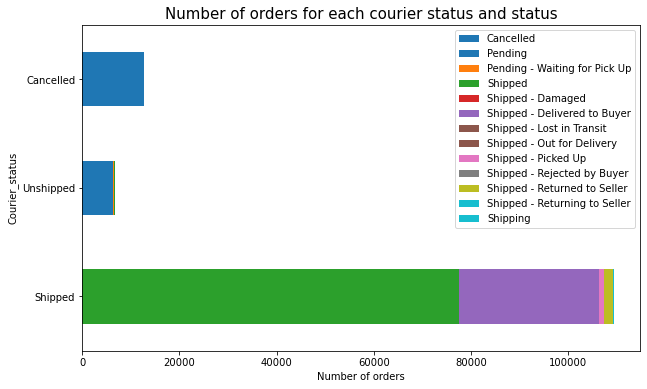

In [5]:
status_pt.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='tab10').legend(loc='upper right')
plt.title('Number of orders for each courier status and status', size=15)
plt.xlabel('Number of orders')
plt.show()

In general we see nothing unusual: most of the orders with the courier status 'Shipped' are either on the way or already delivered, there also about 2000 returned orders. But We also have a lot of cancelled orders for both 'Cancelled' and 'Unshipped' courier statuses: about 14% of all orders from our data are cancelled. This is a big number which can cause problems for both the seller and the courier.

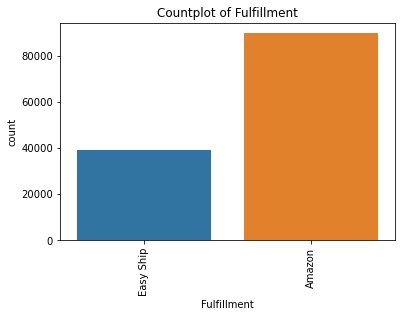

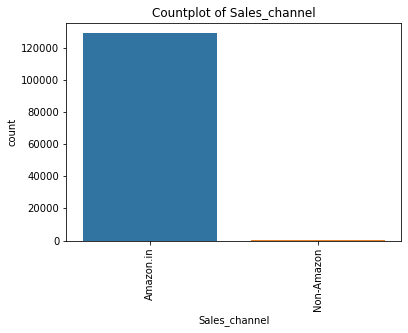

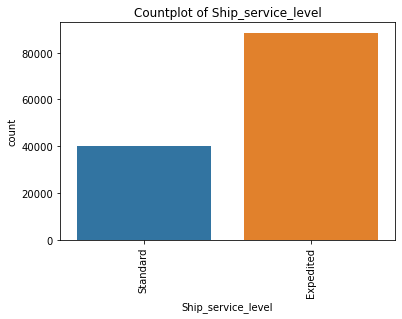

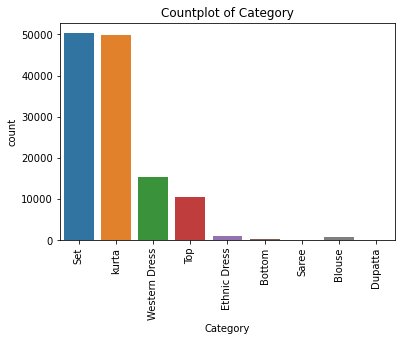

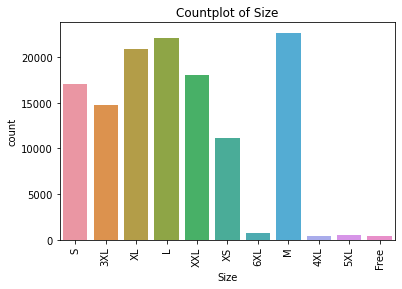

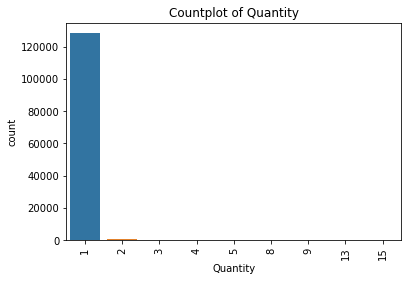

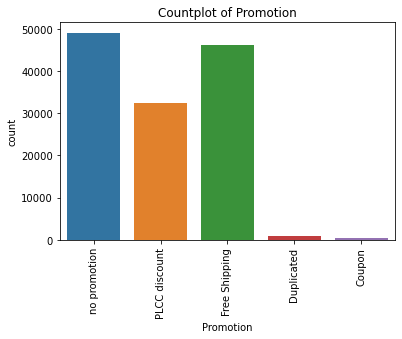

In [6]:
cat_cols=['Fulfillment', 'Sales_channel', 'Ship_service_level', 'Category', 'Size', 'Quantity', 'Promotion']
fig, ax=plt.subplots()
for col in cat_cols:
    sns.countplot(data=amazon_df, x=col, orient='v')
    plt.title('Countplot of '+col)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

So what do we have here? <br>
   - Most of the orders are fulfillment by Amazon but Easy Ship also has significant amount of orders.
   - Very little percentage of orders are sold via non Amazon sales channel.
   - Majority of the orders are delivered by expedited shipping.
   - Sets and Kurtas are the most sold item categories: they are being sold 3-5 times more than items in other categories.
   - Altough products with M and L sizes are the most sold ones, there is also a huge demand for extra large sized items.
   - And the quantity is limitied to 1 item in vast majority of cases.
   - Most of the orders doesn't have any discount, but at the same time a lot of orders have free shipping and PLCC discount by Amazon.

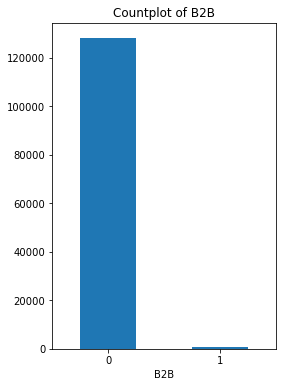

In [7]:
plt.figure(figsize=(4, 6))
amazon_df['B2B'].value_counts().plot(kind='bar')
plt.title('Countplot of B2B')
plt.xlabel('B2B')
plt.xticks(rotation=0)
plt.show()

Very little percentage of customers are companies in this data. </br>
Now let's take a look at the distribution of the 'Price' column using a boxplot.

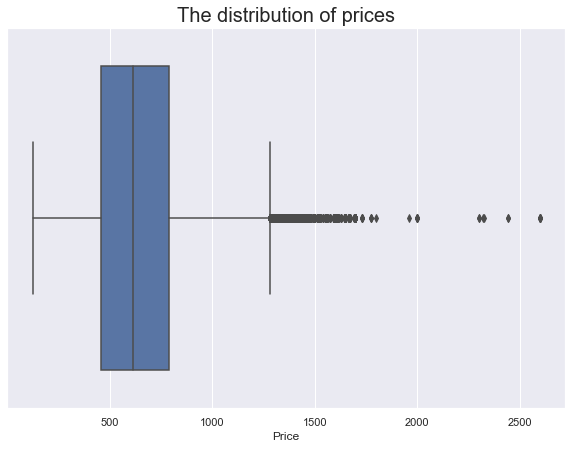

In [8]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x=amazon_df['Price'])
plt.title('The distribution of prices', size=20)
plt.show()

The boxplot shows that our median price is around 600 rupees and the most of the values are between 400-750 rupees. We also have a lot of outliers which maybe can be explained by the different categories of the products.Violinplot can help us to check if this statement is true.

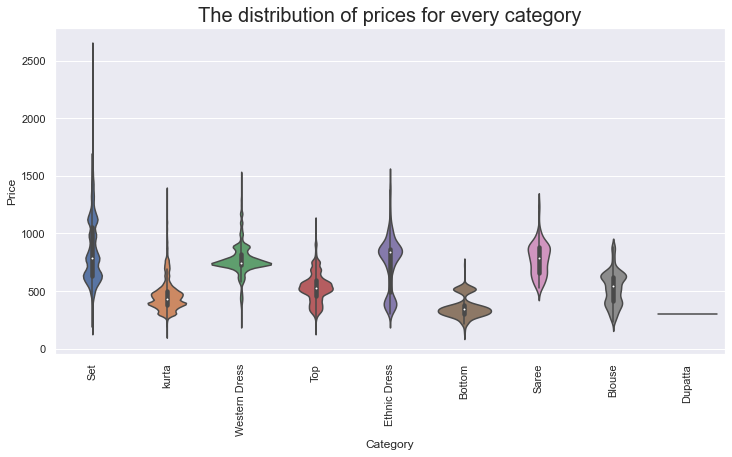

In [9]:
sns.set(rc={'figure.figsize':(12,6)})
sns.violinplot(x=amazon_df['Category'], y=amazon_df['Price'])
plt.title('The distribution of prices for every category', size=20)
plt.xticks(rotation=90)
plt.show()

As we can see from the graph above Sets can be more expensive than all the other categories and have wider range of values.

### Data relationships

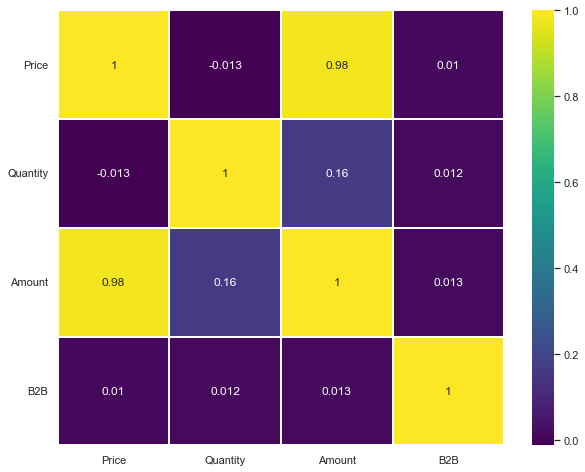

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(amazon_df.corr(), linewidths=.1, annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

The heatmap shows us that there is no significant linear relationship between our numerical values. We'll investigate the relationships between our variables and analyze the data further using Tableau.

In [11]:
%%html
<div class='tableauPlaceholder' id='viz1687644491941' style='position: relative'><noscript><a href='#'><img alt='Amazon sales revenue ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesrevenue&#47;Amazonsalesrevenue&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3_Amazonsalesrevenue&#47;Amazonsalesrevenue' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesrevenue&#47;Amazonsalesrevenue&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687644491941');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='904px';vizElement.style.height='933px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [12]:
%%html
<div class='tableauPlaceholder' id='viz1687644232751' style='position: relative'><noscript><a href='#'><img alt='Amazon weekly order count &amp; average amount ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesweeklyordercountamount&#47;Story4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3_Amazonsalesweeklyordercountamount&#47;Story4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesweeklyordercountamount&#47;Story4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687644232751');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='816px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [31]:
%%html
<div class='tableauPlaceholder' id='viz1687646502671' style='position: relative'><noscript><a href='#'><img alt='Amazon sales quantity ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesrevenue&#47;Amazonsalesquantity&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3_Amazonsalesrevenue&#47;Amazonsalesquantity' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3_Amazonsalesrevenue&#47;Amazonsalesquantity&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687646502671');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='940px';vizElement.style.height='891px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## International Sales

### Data distribution

In [14]:
int_df=pd.read_csv('international_sales_1.csv')
int_df.head()

,Date,Month,Customer_name,Style,SKU,Size,Quantity,Price,Total,Stock,Shipping(per order)
0,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-L,L,1,616.56,617.0,8.0,2250.0
1,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-XL,XL,1,616.56,617.0,4.0,2250.0
2,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617.0,6.0,2250.0
3,2021-06-05,Jun-21,Revathy Loganathan,MEN5009,MEN5009-KR-L,L,1,616.56,617.0,6.0,2250.0
4,2021-06-05,Jun-21,Revathy Loganathan,MEN5011,MEN5011-KR-L,L,1,616.56,617.0,11.0,2250.0


Again, let's start with the 'Date' column

In [15]:
min_date=int_df['Date'].min()
max_date=int_df['Date'].max()
print("The International orders were placed between {} and {}".format(min_date, max_date))

The International orders were placed between 2021-06-05 and 2022-05-11


For International Sales we have wider time range for the orders.

In [16]:
int_df['Customer_name'].value_counts()

Mulberries Boutique               1268
Rivaan Llc                        1016
Cotton Closet Ltd                  657
Bhanu Saleine Naunitham            463
Thilas Bombay Boutique Sdn Bhd     438
                                  ... 
Natheliya                            6
Bhanu Saleine Naunitham              5
Bhavananthini                        4
Aanchol                              4
Dishanu Fashion World                3
Name: Customer_name, Length: 153, dtype: int64

For customer names we have 153 unique values, maybe later we'll need to create a new column to divide our customers to groups based on number of placed orders.

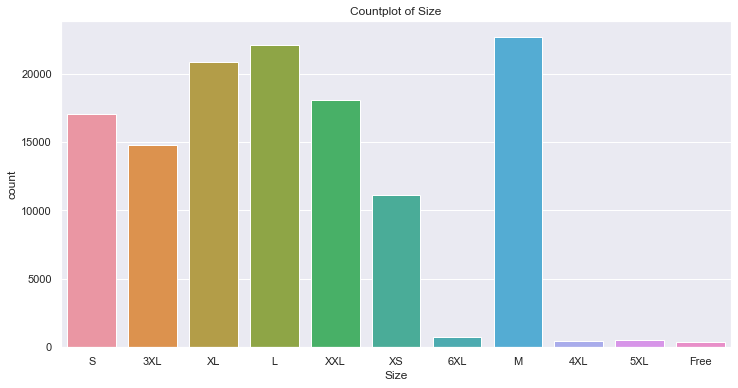

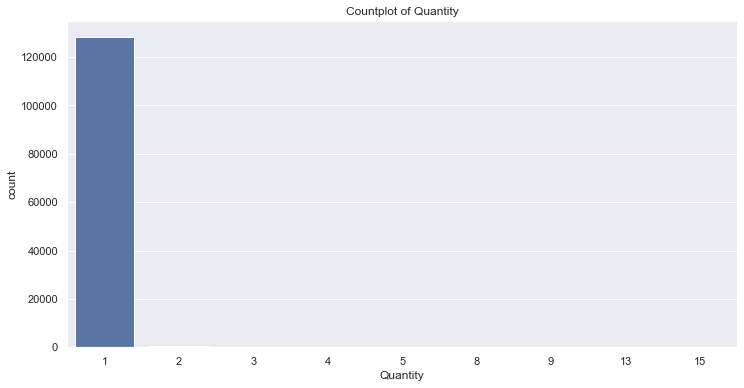

In [17]:
cat_cols=['Size', 'Quantity']
for col in cat_cols:
    sns.countplot(data=amazon_df, x=col, orient='v')
    plt.title('Countplot of '+ col)
    plt.xlabel(col)
    plt.show()

So, the distribution of sizes is very similar is to the one in Amazon sales: products with M and L sizes are the most sold ones, but there is also a huge demand for extra large sized items. And for the quantity most of the products are single ordered items.To investigate the distribution of this column let's exclude the orders with quantity of 1.

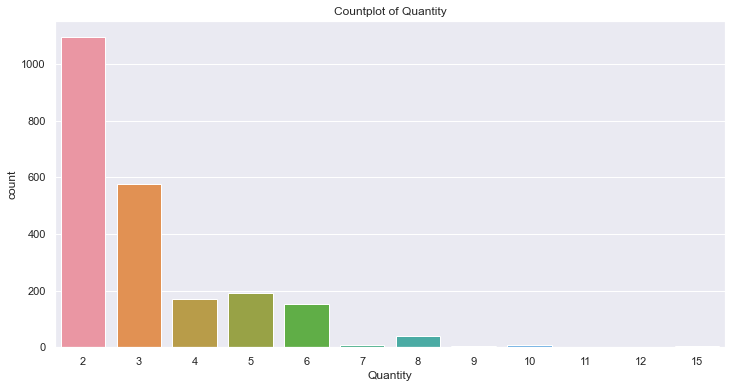

In [18]:
qty2=int_df[int_df['Quantity']>1]
sns.countplot(data=qty2, x=col, orient='v')
plt.title('Countplot of '+ col)
plt.xlabel(col)
plt.show()

Now let's take a look at the distribution of the 'Price' column using a boxplot.

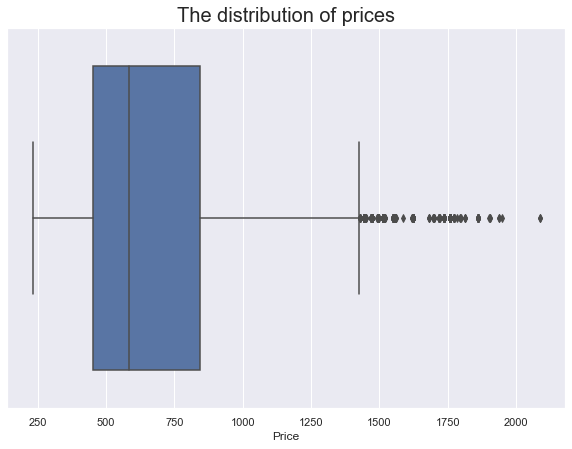

In [19]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x=int_df['Price'])
plt.title('The distribution of prices', size=20)
plt.show()

Again, the distribution is very similar to the one in previous data: the boxplot shows that our median price is around 600 rupees and the most of the values are between 450-850 rupees. We also have a lot of outliers but for this data unfortunately we don't have information about categories to analyze the price differences between different categories.

Let's plot another boxplot for the 'Stock' column. but first we need to group the items by their SKU.

In [20]:
items_stock=int_df.groupby('SKU')['Stock'].mean()
items_stock

SKU
AN202-ORANGE-L      14.0
AN202-ORANGE-M       8.0
AN202-ORANGE-S      20.0
AN202-ORANGE-XL     13.0
AN202-ORANGE-XXL    24.0
                    ... 
sEt329               0.0
sEt334               0.0
sEt339               0.0
sEt353               0.0
set345               0.0
Name: Stock, Length: 4910, dtype: float64

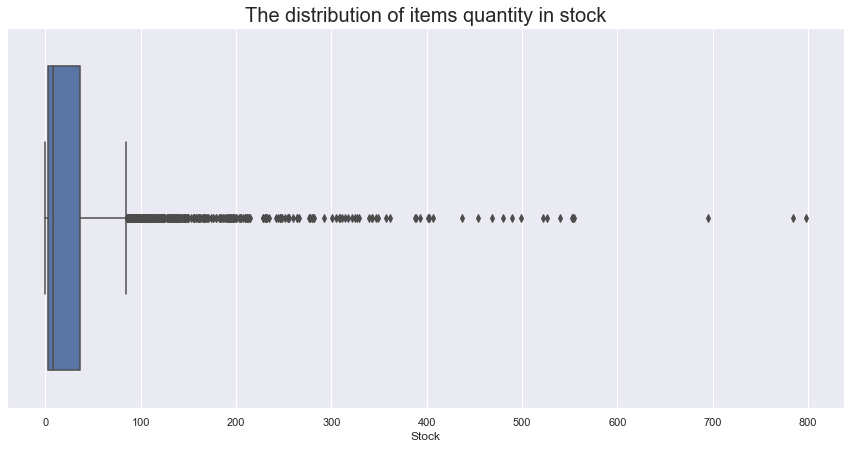

In [21]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x=items_stock)
plt.title('The distribution of items quantity in stock', size=20)
plt.show()

So, most of the products have less than 50 items in stock but there are a lot of outliers with larger quantities.</br>
Let's also take a look at the shipping costs for the orders:

In [22]:
orders_shipping=int_df.groupby(['Date', 'Customer_name'])['Shipping(per order)'].mean()

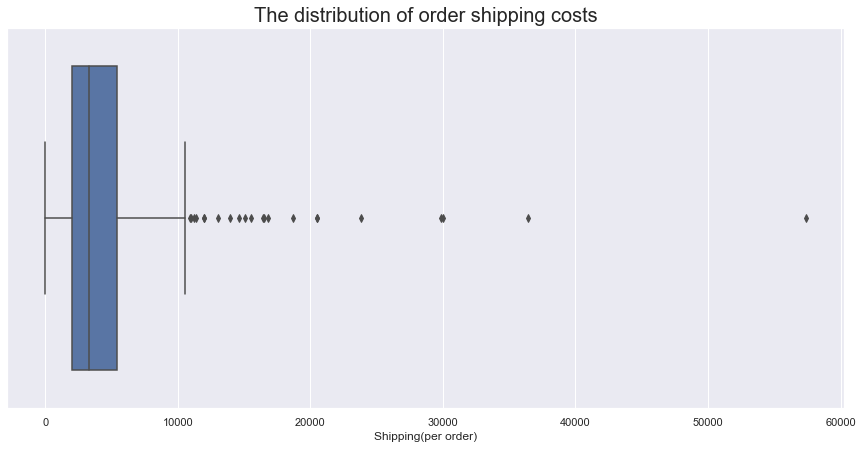

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x=orders_shipping)
plt.title('The distribution of order shipping costs', size=20)
plt.show()

The boxplot shows that most of the orders have shipping ocsts between 2000-6000 and the median value is around 4000 rupees. We'll investigate the relationships between variables further in Tableau. Now let's plot a heatmap for the correlations between variables.

### Data relationships

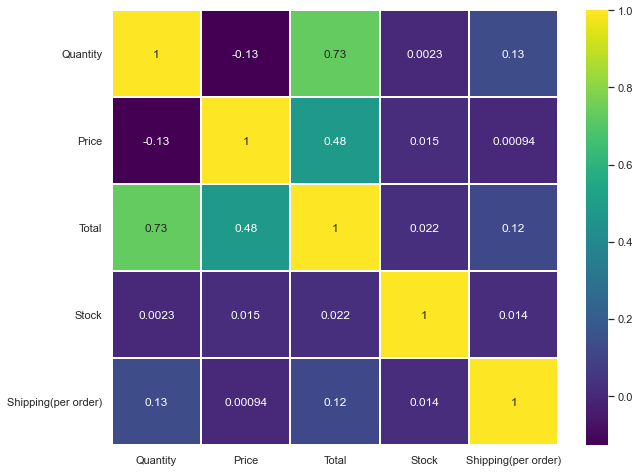

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(int_df.corr(), linewidths=.1, annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

We can notice an interesting positive relationship between shipping cost and quantity and total amount columns. the correlation coefficent is low but we also need to take into consideration the fact that the shipping costs represent the amount for the entire order not the separate item. </br>
To investigate this dataset further we'll need a new order id column based on the Customer name and date.

In [25]:
int_df['Order_ID'] = int_df[['Date', 'Customer_name']].sum(axis=1).map(hash)
ccols=['Order_ID', 'Date', 'Month', 'Customer_name', 'Style', 'SKU', 'Size', 'Quantity',
       'Price', 'Total', 'Stock', 'Shipping(per order)']
int_df=int_df.reindex(columns=ccols)

In [26]:
int_df.head()

,Order_ID,Date,Month,Customer_name,Style,SKU,Size,Quantity,Price,Total,Stock,Shipping(per order)
0,-6056861894448732620,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-L,L,1,616.56,617.0,8.0,2250.0
1,-6056861894448732620,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-XL,XL,1,616.56,617.0,4.0,2250.0
2,-6056861894448732620,2021-06-05,Jun-21,Revathy Loganathan,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617.0,6.0,2250.0
3,-6056861894448732620,2021-06-05,Jun-21,Revathy Loganathan,MEN5009,MEN5009-KR-L,L,1,616.56,617.0,6.0,2250.0
4,-6056861894448732620,2021-06-05,Jun-21,Revathy Loganathan,MEN5011,MEN5011-KR-L,L,1,616.56,617.0,11.0,2250.0


In [27]:
%%html
<div class='tableauPlaceholder' id='viz1687642601882' style='position: relative'><noscript><a href='#'><img alt='International Sales total revenue and shipping costs ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalestotalrevenueandshippingcosts&#47;InternationalSalestotalrevenueandshippingcosts&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3InternationalSalestotalrevenueandshippingcosts&#47;InternationalSalestotalrevenueandshippingcosts' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalestotalrevenueandshippingcosts&#47;InternationalSalestotalrevenueandshippingcosts&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687642601882');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [28]:
%%html
<div class='tableauPlaceholder' id='viz1687646393451' style='position: relative'><noscript><a href='#'><img alt='The average number of items in stock vs sold items for each size (International sales) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalesin-stockvssolditems&#47;soldvsinstock&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3InternationalSalesin-stockvssolditems&#47;soldvsinstock' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalesin-stockvssolditems&#47;soldvsinstock&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687646393451');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='816px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [29]:
%%html
<div class='tableauPlaceholder' id='viz1687646269711' style='position: relative'><noscript><a href='#'><img alt='International sales number of monthly active customers, orders and average order amounts. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalesnumberofcsordam&#47;Story3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone3InternationalSalesnumberofcsordam&#47;Story3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone3InternationalSalesnumberofcsordam&#47;Story3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1687646269711');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='816px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [30]:
amazon_df.to_csv('amazon_sales_2.csv', index=False)
int_df.to_csv('international_sales_2.csv', index=False)